## Data Analysis for Audio Annotations

This Jupyter Notebook performs a data analysis on the `audio_annotations.csv` dataset. The dataset includes information about audio files, recorders, dates, times, audio durations, start and end times, and species.

### Visualizations Included

1. **Number of Audio Files by Recorder**: A bar chart showing the distribution of audio files among different recorders.

2. **Frequency of Species**: A bar chart displaying the frequency of each species in the dataset.

3. **Distribution of Audio Durations**: A histogram illustrating the distribution of audio durations.

4. **Time of Recordings**: A line chart showing the number of audio files recorded at different times of the day.

5. **Date of Recordings**: A line chart indicating the number of audio files recorded on different dates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re # case sensitive

In [2]:
ROOT_PATH = "../../../desarrollo/"

input_file = ROOT_PATH + "Data/Annotations/" + "o02_audio_annotations.csv"

In [3]:
# Read the CSV file
df = pd.read_csv(input_file)

In [4]:
# Number of rows of df
print("Number of annotations: ", len(df))

Number of annotations:  3449


## Number of Audio Files by Recorder

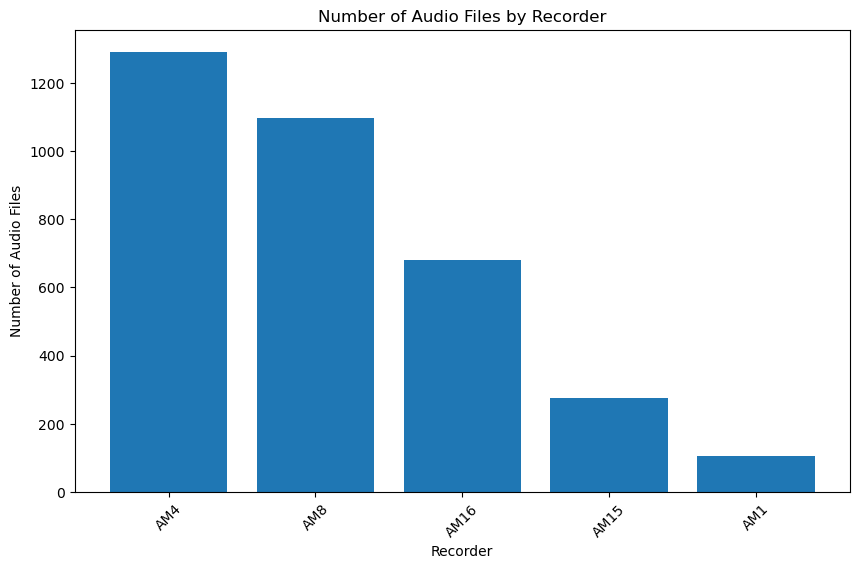

In [5]:
# Count the number of audio files by recorder
recorder_counts = df['recorder'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Audio Files')
plt.title('Number of Audio Files by Recorder')
plt.xticks(rotation=45)
plt.show()

## Frequency of species

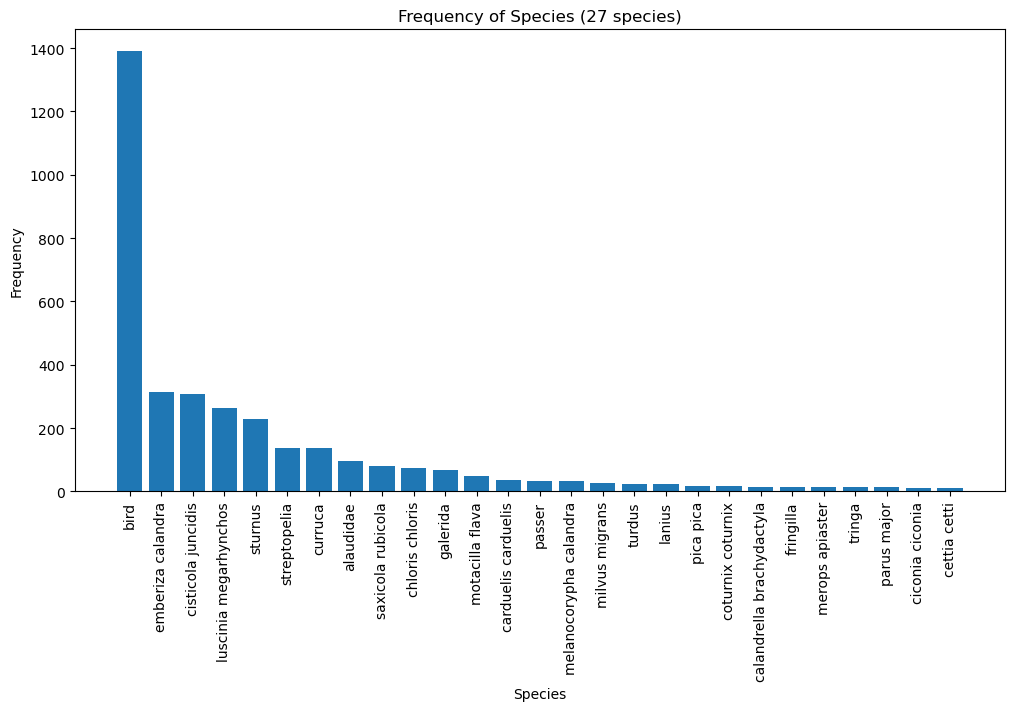

In [6]:
# Count the frequency of each species
species_counts = df['specie'].value_counts()

num_species = len(species_counts.index)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Print count of each specie
print(species_counts)

specie
bird                         1390
emberiza calandra             313
cisticola juncidis            309
luscinia megarhynchos         263
sturnus                       227
streptopelia                  138
curruca                       137
alaudidae                      95
saxicola rubicola              80
chloris chloris                75
galerida                       66
motacilla flava                50
carduelis carduelis            37
passer                         34
melanocorypha calandra         33
milvus migrans                 26
turdus                         24
lanius                         23
pica pica                      17
coturnix coturnix              16
calandrella brachydactyla      15
fringilla                      15
merops apiaster                15
tringa                         13
parus major                    13
ciconia ciconia                12
cettia cetti                   12
Name: count, dtype: int64


## Distribution of Audio Duration

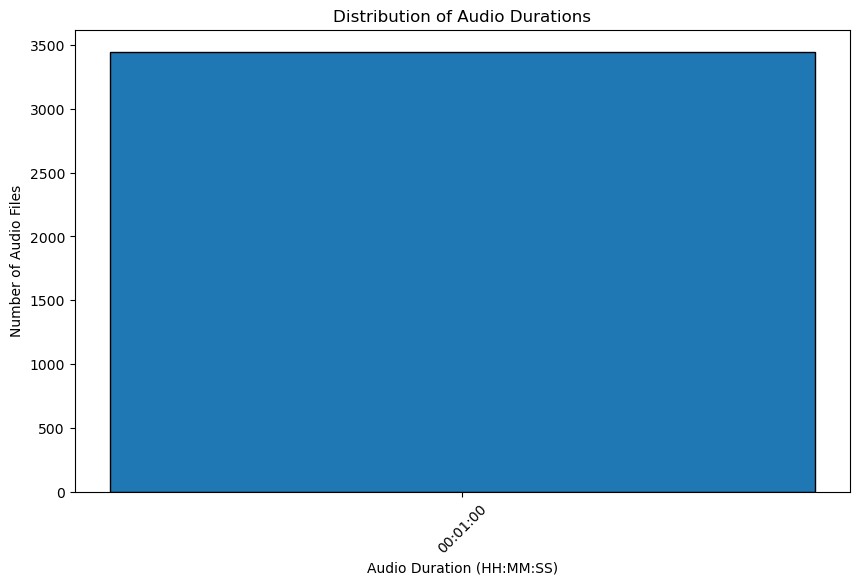

In [8]:
audio_duration_count = df['audio_duration'].value_counts()

# Plot a histogram of audio durations
plt.figure(figsize=(10, 6))
plt.bar(audio_duration_count.index, audio_duration_count.values, edgecolor='k')
plt.xlabel('Audio Duration (HH:MM:SS)')
plt.ylabel('Number of Audio Files')
plt.title('Distribution of Audio Durations')
plt.xticks(rotation=45)
plt.show()

## Time of recordings

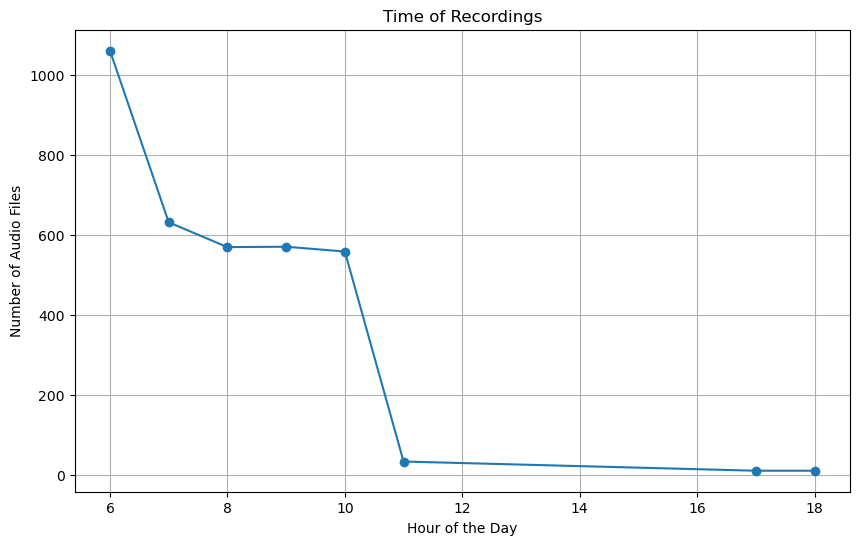

In [9]:
# Convert 'time' to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Extract the hour of the day
df['hour'] = df['time'].dt.hour

# Count the number of audio files recorded at each hour
time_counts = df['hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Audio Files')
plt.title('Time of Recordings')
plt.grid(True)
plt.show()

## Date of recordings

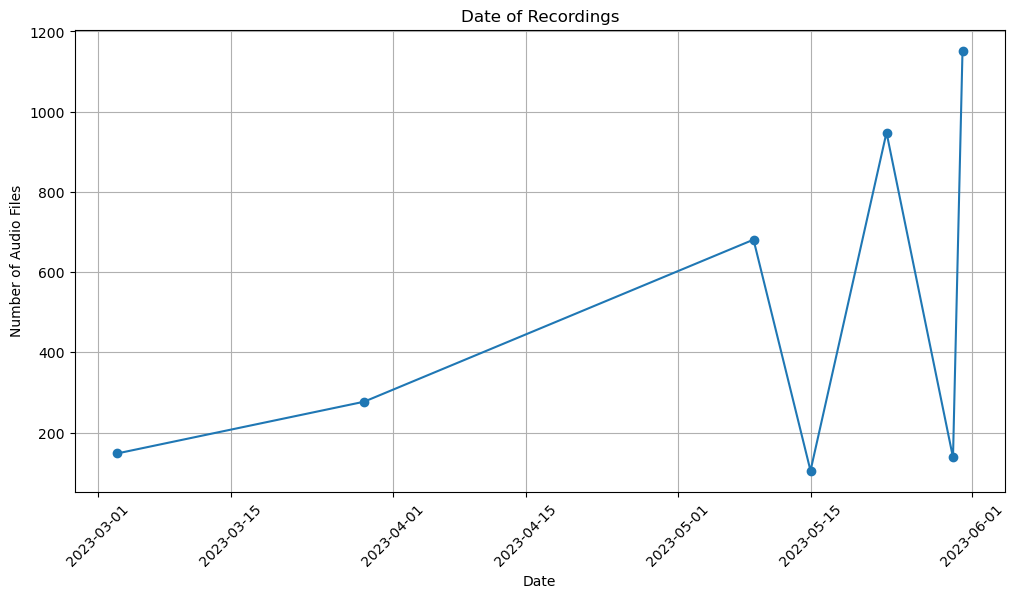

In [10]:
# Convert 'date' to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Extract the date without time
df['date_only'] = df['date'].dt.date

# Count the number of audio files recorded on each date
date_counts = df['date_only'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Audio Files')
plt.title('Date of Recordings')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


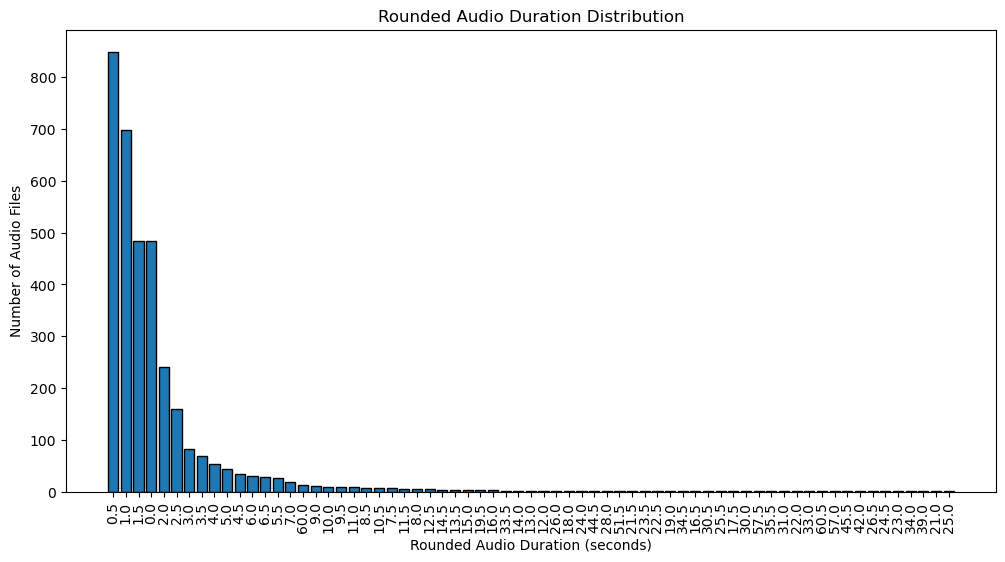

In [11]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: round(x * 2) / 2).astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()#.sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor = "k")
plt.xlabel('Rounded Audio Duration (seconds)')
plt.ylabel('Number of Audio Files')
plt.title('Rounded Audio Duration Distribution')
plt.xticks(rotation=90)
plt.show()

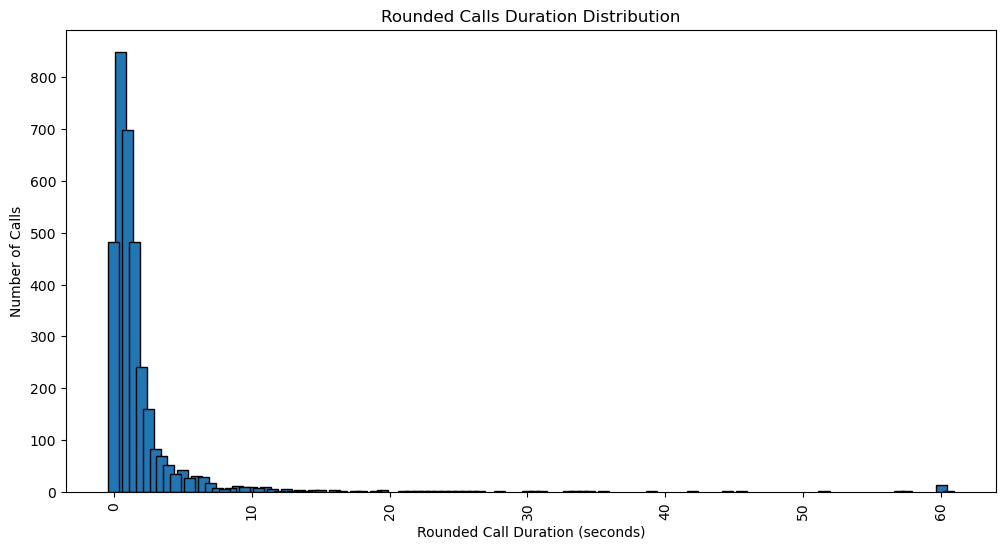

In [12]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: (round(x * 2) / 2))#.astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor="k")
plt.xlabel('Rounded Call Duration (seconds)')
plt.ylabel('Number of Calls')
plt.title('Rounded Calls Duration Distribution')
plt.xticks(rotation=90)
plt.show()
